In [45]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import random




In [46]:
all_genes = pd.read_csv('extracted_data/GxG_filled.csv', sep = ',', index_col = 0)
all_genes

ExE = pd.read_csv('extracted_data/ExE_imputed.csv', sep = ',', index_col = 0)
NxN = pd.read_csv('extracted_data/NxN_imputed.csv', sep = ',', index_col = 0)

R2:  -1.1035771417334725
RMSE: 0.1722403042543809


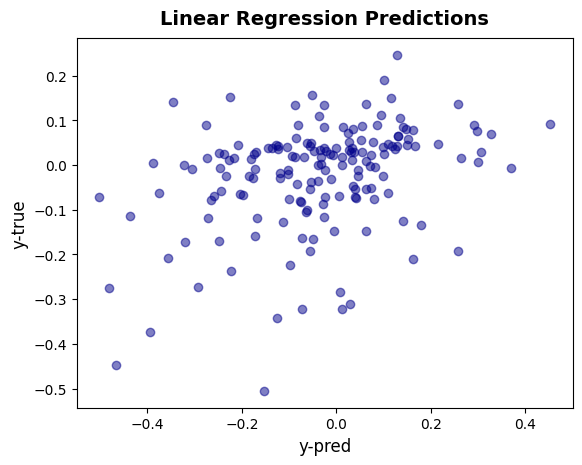

In [47]:
target_column = random.choice(ExE.columns)  # Randomly pick a column name

X = ExE.drop(columns=[target_column])  # Features (all columns except the target)
y = ExE[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.9187885285928965


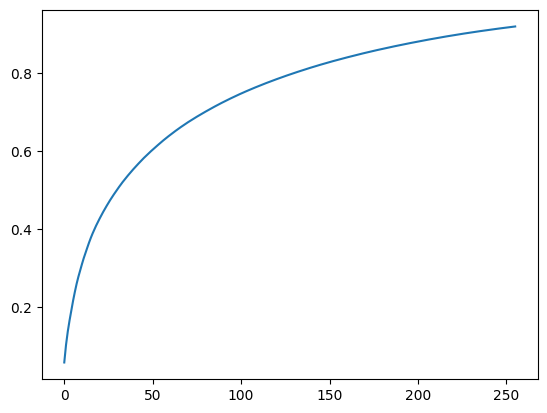

In [48]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [49]:
dims = 256
ExE_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExE_PCA

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.043267,-0.082210,-0.362419,0.464873,0.089584,0.032987,0.442140,-0.464201,0.212471,0.057395,...,0.008303,-0.002096,-0.001058,0.007091,-0.029884,-0.018369,0.063684,0.037748,0.037265,-0.008774
1,-0.209354,-0.112720,-0.485540,0.478260,-0.100480,0.030640,0.547906,-0.530616,0.167764,0.259248,...,-0.016951,0.010400,-0.031133,-0.030726,0.102798,0.009113,0.078314,0.038165,-0.014308,0.064406
2,-0.960786,-0.422619,0.113567,0.042143,0.064616,-0.160972,-0.025181,-0.095996,0.138578,0.268158,...,0.014678,-0.088739,-0.062282,-0.007130,-0.083286,0.024603,-0.122206,-0.124811,-0.123612,-0.013131
3,0.200310,-0.710125,-0.406371,0.973020,0.170557,-0.078856,0.503191,-0.189048,0.637153,-0.253980,...,-0.026465,0.045900,0.039964,-0.014369,0.034270,-0.032772,0.022860,0.013886,0.010030,0.076688
4,0.163745,0.188452,0.000150,0.246853,-0.226179,-0.241102,0.099907,0.186454,-0.155392,-0.254373,...,-0.011463,0.028151,0.024767,-0.000938,0.035106,0.091057,-0.046774,0.051813,-0.000055,0.047001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,-0.027985,0.117325,-0.050572,-0.185074,0.059885,0.214290,-0.001011,0.115074,-0.113700,0.056982,...,-0.072497,0.044816,0.005201,-0.042701,-0.037768,0.051095,0.040219,-0.015164,0.038320,0.004111
820,-0.057055,0.224025,0.143434,0.357744,-0.064253,0.313467,0.016647,-0.178478,0.085739,-0.098849,...,-0.017550,-0.009700,0.003572,0.077086,-0.043904,0.038769,0.031567,-0.110371,0.047496,0.005841
821,-0.112477,0.358928,0.110976,0.274379,0.168888,0.519051,0.146406,-0.199362,0.197452,0.023357,...,0.030465,-0.044924,0.023113,-0.093236,-0.082589,0.060932,0.004387,0.048251,0.066002,0.007173
822,0.058386,0.074330,-0.028751,-0.016210,0.170394,0.252797,0.120276,-0.042291,0.055963,-0.068699,...,0.021963,0.000400,-0.000039,-0.021085,-0.031557,0.072689,-0.078887,0.058679,-0.022601,-0.058366


R2:  0.33473548092487726
RMSE: 0.09686184637677588


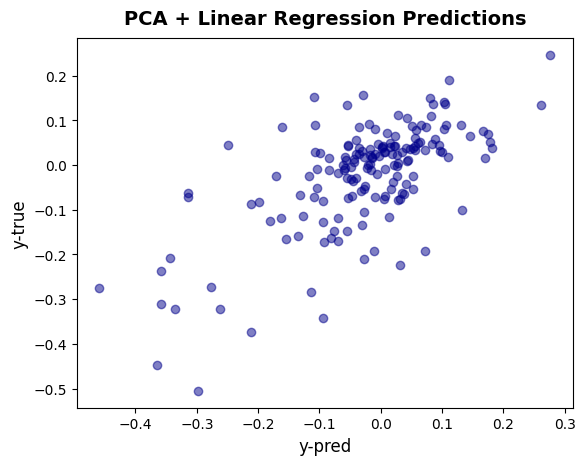

In [50]:
X_train, X_test, y_train, y_test = train_test_split(ExE_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()